# 📘 OTTO – Multi-Objective Recommender System

## Notebook 1: Day 1–2 (EDA + Baseline Candidate Generation)

# Day 1 — Dataset Loading & Basic EDA

## 🧭 Introduction
In Day 1, we focus on preparing the environment, loading the OTTO dataset,  
and performing lightweight EDA that does not exceed the memory limits in Kaggle.

The dataset uses `.jsonl` format, which can be extremely large.  
To avoid kernel crashes, we read the data using **streaming** instead of loading the whole file.

## 1. Setup and Imports

In [27]:
import json
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

train_path = "/kaggle/input/recsys-dataset/otto-recsys-train.jsonl"
test_path = "/kaggle/input/recsys-dataset/otto-recsys-test.jsonl"
print("Train file exists:", os.path.exists(train_path))
print("Test file exists:", os.path.exists(test_path))

Train file exists: False
Test file exists: False


## 2. Streaming Reader(Memory-Safe)

In [28]:
def stream_jsonl(path, chunk_size=200_000):
    batch = []
    with open(path, "r") as f:
        for line in f:
            batch.append(json.loads(line))
            if len(batch) >= chunk_size:
                yield batch
                batch = []
    if batch:
        yield batch

## 3.Lightweight EDA

In [ ]:
event_count = Counter()
item_count = Counter()
num_sessions = 0

for batch in tqdm(stream_jsonl(train.jsonl, chunk_size=200_000)):
    for session in batch:
        num_sessions += 1
        for action in session["events"]:
            event_count[action["type"]] += 1
            item_count[action["aid"]] += 1

print("Total sessions:", num_sessions)
print("Event distribution:", event_count)
print("Top items:", item_count.most_common(10))

NameError: name 'train' is not defined

## 4.Visualize Event Distribution

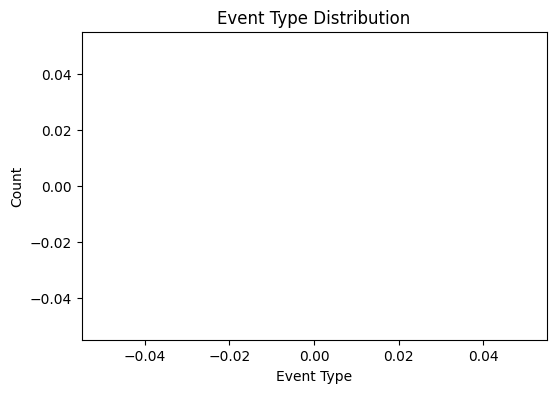

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(event_count.keys(), event_count.values())
plt.title("Event Type Distribution")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()

## 5.Sample Item Popularity Plot

In [ ]:
top_items = item_count.most_common(20)
items, counts = zip(*top_items)

plt.figure(figsize=(10,4))
plt.bar(range(len(items)), counts)
plt.title("Top 20 Most Popular Items")
plt.xlabel("Item ID")
plt.ylabel("Interaction Count")
plt.show()

ValueError: not enough values to unpack (expected 2, got 0)